<a href="https://www.kaggle.com/code/mahendrasinghrajpoot/nasa-classification-task?scriptVersionId=99154755" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# NASA Asterod classification

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv('../input/nasa-nearest-earth-objects/neo.csv')

In [3]:
data.shape

(90836, 10)

In [4]:
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [5]:
data.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [6]:
data ['hazardous'].value_counts()

False    81996
True      8840
Name: hazardous, dtype: int64

In [7]:
data_1 = data.drop(['id','name','orbiting_body'],axis=1)

In [8]:
data['sentry_object'].value_counts()

False    90836
Name: sentry_object, dtype: int64

In [9]:
data_2 = data_1.drop(['sentry_object'],axis=1)

In [10]:
data_2


,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00,False
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80,False


<AxesSubplot:>

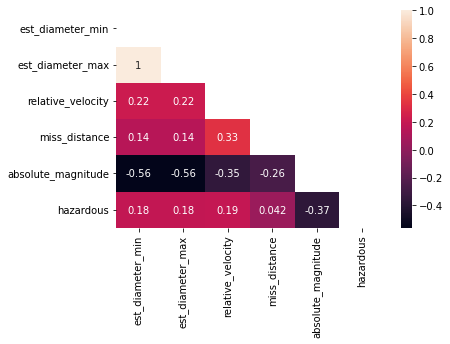

In [11]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data_2.corr(), dtype=bool))
sns.heatmap(data_2.corr(),mask = mask ,annot=True)

In [12]:
#new_label = {"hazardous":{"False":0 ,"True":1}}

In [13]:
data_2['hazardous'].dtypes

dtype('bool')

In [14]:
#new_label = {"False":0 ,"True":1}

In [15]:
data_2['hazardous'] = data_2['hazardous'].replace({False:0 ,True:1})#so we are encoding the boolean values into o and 1 values we do not need to keep them in the strings values as they are already in the boolena values

In [16]:
data_2

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1
...,...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00,0
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00,0
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60,0
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80,0


In [17]:
#we are defining the variables here to process the variables and test and train split
#providing the dataframe to the dataset
data_3 = data_2.copy()#coping the dataset to the dataframe so that we will accidently do the manupulation on the original dataset
    
#data_3['hazardous'] = data_3['hazardous'].replace(new_label)#providing the labels to the categorical variables
#data_3['hazardous'] = labelencoder.fit_tranform(data_3['hazardous'])

    
y = data_3['hazardous'].copy()#giving the response to the variable
X = data_3.drop('hazardous', axis=1).copy()#providing the predictors to the variables
    
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)#using the sklearn to split the dataset


In [18]:
X_train.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
76698,0.016771,0.037501,47188.615295,4.502267e+07,26.00
17274,0.024241,0.054205,64255.454093,7.254386e+07,25.20
17269,0.092163,0.206082,70189.149838,1.615456e+07,22.30
88218,0.111829,0.250058,49960.572475,2.496689e+07,21.88
70633,0.161642,0.361443,42482.496994,5.490078e+07,21.08


In [19]:
y_train.head()

76698    0
17274    0
17269    0
88218    0
70633    1
Name: hazardous, dtype: int64